In [100]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, urlretrieve
import os
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
#Bojack horseman fandom wiki
main ='https://bojackhorseman.fandom.com/wiki/Category:Characters_by_species'

In [64]:
#Collect category names and links
main_page = urlopen(main)
soup_top = bs(main_page, "lxml")
categories = []
cat_text = []
for a in soup_top.find_all('a', {"class": "category-page__member-link"}):
    cat_text.append(a.text)
    categories.append(a['href'])

In [65]:
#Get notebook directory
path = os.getcwd()
path

'/Users/air/Documents/Portfolio/Bojack'

In [109]:
#Create empty dataframe
chars = pd.DataFrame(columns=['Species', 'Name'])

In [110]:
#Open every category link
for cat in categories:
    new = cat.replace("/wiki/Category:", "")
    #Create new folders for each category
    os.mkdir(new)
    page = urlopen("https://bojackhorseman.fandom.com/" +cat)
    soup = bs(page, "lxml")
    for img in soup.find_all('img', {"class": "category-page__member-thumbnail lzy lzyPlcHld"}):
        file = img['alt']
        #Populate dataframe with name and species
        chars = chars.append({'Species': new, 'Name': file}, ignore_index=True)
        loc = path+'/'+new+'/'+file+ '.jpg'
        #I also saved the thumbnail of each character for a future project
        urlretrieve(img['data-src'], loc)

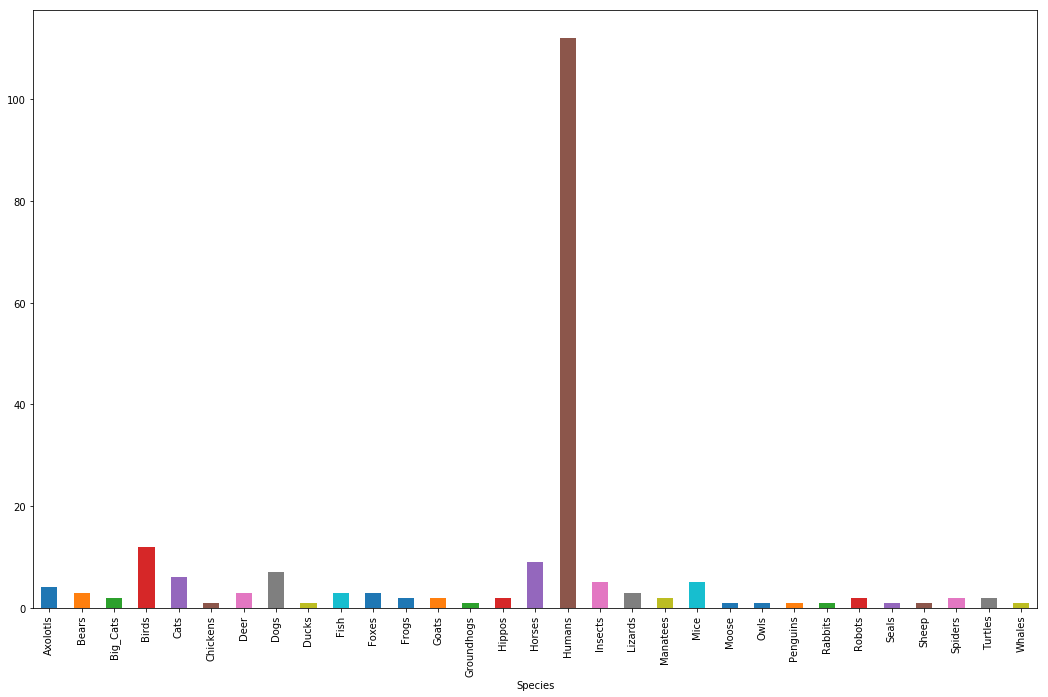

In [111]:
plt.figure(figsize=(18,11))
chars.groupby('Species')['Name'].nunique().plot(kind='bar')
plt.show()

In [112]:
chars['Species'].value_counts()

Humans        112
Birds          12
Horses          9
Dogs            7
Cats            6
Mice            5
Insects         5
Axolotls        4
Foxes           3
Deer            3
Lizards         3
Bears           3
Fish            3
Big_Cats        2
Goats           2
Hippos          2
Robots          2
Manatees        2
Frogs           2
Turtles         2
Spiders         2
Penguins        1
Sheep           1
Groundhogs      1
Moose           1
Rabbits         1
Owls            1
Chickens        1
Seals           1
Whales          1
Ducks           1
Name: Species, dtype: int64

In [176]:
#Create new dataframe with the value_counts
Bojack = pd.DataFrame(chars['Species'].value_counts())
Bojack = Bojack.reset_index()
Bojack.columns = ['Species', 'Bojack']

In [171]:
Bojack

,Species,Bojack
0,Humans,112
1,Birds,12
2,Horses,9
3,Dogs,7
4,Cats,6
5,Mice,5
6,Insects,5
7,Axolotls,4
8,Foxes,3
9,Deer,3


In [180]:
#Create new dataframe with the earth populations
#Collected from various online sources
Earth = pd.DataFrame({'Species':['Humans','Cow','Sheep', 'Pigs', 'Dogs', 'Goats', 'Rabbits', 'Cats', 'Horses'],
                   'Earth':[7600000000,1500000000,1100000000,1000000000,900000000,860000000, 709000000, 600000000,60000000]})

Human = 7.6 Billion <br>
Cow = 1.5 Billion <br>
Sheep = 1.1 Billion <br>
Pig = 1 Billion <br>
Dog =900 Million <br>
Goat= 860 Million <br>
Rabbit = 709 Million <br>
Cat = 600 Million <br>
Tame Water Buffalo = 175 Million <br>
Horse = 60 Million <br>

In [181]:
Earth

,Species,Earth
0,Humans,7600000000
1,Cow,1500000000
2,Sheep,1100000000
3,Pigs,1000000000
4,Dogs,900000000
5,Goats,860000000
6,Rabbits,709000000
7,Cats,600000000
8,Horses,60000000


In [182]:
#Merge the Bojack and the Earth dataframes
res = pd.merge(Bojack, Earth, how='left', left_on='Species', right_on='Species')

In [183]:
res

,Species,Bojack,Earth
0,Humans,112,7.600000e+09
1,Birds,12,NaN
2,Horses,9,6.000000e+07
3,Dogs,7,9.000000e+08
4,Cats,6,6.000000e+08
5,Mice,5,NaN
6,Insects,5,NaN
7,Axolotls,4,NaN
8,Foxes,3,NaN
9,Deer,3,NaN


In [188]:
#Drop rows with NaNs
clean = res.dropna().reset_index(drop=True)
clean

,Species,Bojack,Earth
0,Humans,112,7.600000e+09
1,Horses,9,6.000000e+07
2,Dogs,7,9.000000e+08
3,Cats,6,6.000000e+08
4,Goats,2,8.600000e+08
5,Sheep,1,1.100000e+09
6,Rabbits,1,7.090000e+08


## Experimenting with different scaling techniques

In [197]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [201]:
scaler1 = MinMaxScaler()
scaler2 =StandardScaler()
copy1 = clean.copy()
copy2 = clean.copy()

In [202]:
copy1[['Bojack','Earth']] = scaler1.fit_transform(copy1[['Bojack','Earth']])
copy1

,Species,Bojack,Earth
0,Humans,1.000000,1.000000
1,Horses,0.072072,0.000000
2,Dogs,0.054054,0.111406
3,Cats,0.045045,0.071618
4,Goats,0.009009,0.106101
5,Sheep,0.000000,0.137931
6,Rabbits,0.000000,0.086074


In [203]:
copy2[['Bojack','Earth']] = scaler2.fit_transform(copy2[['Bojack','Earth']])
copy2

,Species,Bojack,Earth
0,Humans,2.442209,2.430328
1,Horses,-0.283538,-0.670219
2,Dogs,-0.336465,-0.324800
3,Cats,-0.362929,-0.448163
4,Goats,-0.468783,-0.341248
5,Sheep,-0.495247,-0.242557
6,Rabbits,-0.495247,-0.403341


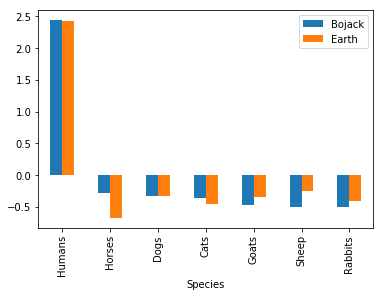

In [204]:
copy2.plot(x='Species', y=['Bojack','Earth'], kind="bar")

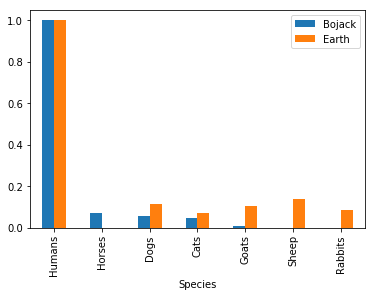

In [205]:
copy1.plot(x='Species', y=['Bojack','Earth'], kind="bar")

In [211]:
copy3 = clean.copy()

In [212]:
scaler3 = MinMaxScaler()

In [213]:
scaler3.fit(copy3[['Bojack']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [214]:
copy3[['Earth']] = scaler3.transform(copy3[['Earth']])
copy3

,Species,Bojack,Earth
0,Humans,112,6.846847e+07
1,Horses,9,5.405405e+05
2,Dogs,7,8.108108e+06
3,Cats,6,5.405405e+06
4,Goats,2,7.747748e+06
5,Sheep,1,9.909910e+06
6,Rabbits,1,6.387387e+06


## I decided to go with a simpler scaling technique
Each value is divided by the summation of the column.

In [220]:
test = clean.copy()

In [221]:
test

,Species,Bojack,Earth
0,Humans,112,7.600000e+09
1,Horses,9,6.000000e+07
2,Dogs,7,9.000000e+08
3,Cats,6,6.000000e+08
4,Goats,2,8.600000e+08
5,Sheep,1,1.100000e+09
6,Rabbits,1,7.090000e+08


In [223]:
#Scaling
test['Bojack']= (test['Bojack']/test['Bojack'].sum())

In [226]:
test['Earth']= (test['Earth']/test['Earth'].sum())

In [227]:
test

,Species,Bojack,Earth
0,Humans,0.811594,0.642489
1,Horses,0.065217,0.005072
2,Dogs,0.050725,0.076084
3,Cats,0.043478,0.050723
4,Goats,0.014493,0.072703
5,Sheep,0.007246,0.092992
6,Rabbits,0.007246,0.059937


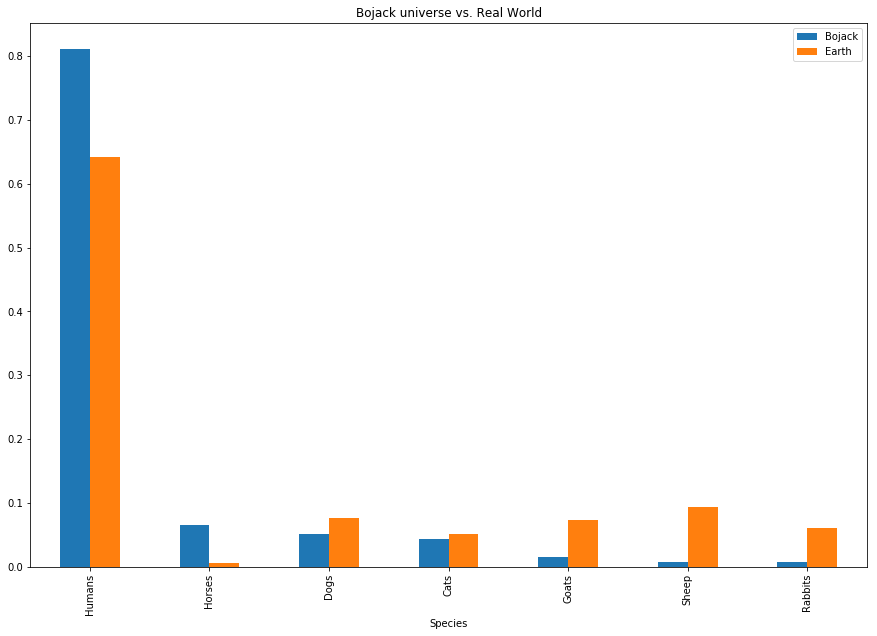

In [241]:
test.plot(x='Species', y=['Bojack','Earth'], kind="bar", figsize=(15, 10), title= 'Bojack universe vs. Real World')

In [235]:
#Add column for the variance
test['Difference']= (test['Bojack']-test['Earth']).round(3)

In [236]:
test

,Species,Bojack,Earth,Difference
0,Humans,0.811594,0.642489,0.169
1,Horses,0.065217,0.005072,0.060
2,Dogs,0.050725,0.076084,-0.025
3,Cats,0.043478,0.050723,-0.007
4,Goats,0.014493,0.072703,-0.058
5,Sheep,0.007246,0.092992,-0.086
6,Rabbits,0.007246,0.059937,-0.053


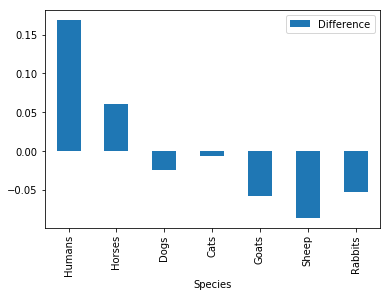

In [237]:
test.plot(x='Species', y=['Difference'], kind="bar")

# Here I compared against only the population in the United States

## United States
- Horses 9,200,000
- Humans 329,800,000
- Dogs 89,700,000
- Cats 95,600,000
- Deer 30,000,000
- Bears 500,000
- Sheep 5,200,000

In [247]:
#Create dataframe for US populations
US = pd.DataFrame({'Species':['Humans','Horses','Dogs', 'Cats', 'Deer', 'Bears', 'Sheep'],
                   'US':[329800000, 9200000, 89700000, 95600000, 30000000, 500000, 5200000]})



In [245]:
US

,species,US
0,Humans,329800000
1,Horses,9200000
2,Dogs,89700000
3,Cats,95600000
4,Deer,30000000
5,Bears,500000
6,Sheep,5200000


In [246]:
Bojack

,Species,Bojack
0,Humans,112
1,Birds,12
2,Horses,9
3,Dogs,7
4,Cats,6
5,Mice,5
6,Insects,5
7,Axolotls,4
8,Foxes,3
9,Deer,3


In [248]:
#Merge Bojack dataframe with US dataframe
res1 = pd.merge(Bojack, US, how='left', left_on='Species', right_on='Species')
res1

,Species,Bojack,US
0,Humans,112,329800000.0
1,Birds,12,NaN
2,Horses,9,9200000.0
3,Dogs,7,89700000.0
4,Cats,6,95600000.0
5,Mice,5,NaN
6,Insects,5,NaN
7,Axolotls,4,NaN
8,Foxes,3,NaN
9,Deer,3,30000000.0


In [249]:
clean1 = res1.dropna().reset_index(drop=True)
clean1

,Species,Bojack,US
0,Humans,112,329800000.0
1,Horses,9,9200000.0
2,Dogs,7,89700000.0
3,Cats,6,95600000.0
4,Deer,3,30000000.0
5,Bears,3,500000.0
6,Sheep,1,5200000.0


In [250]:
#Scale each column
clean1['Bojack']= (clean1['Bojack']/clean1['Bojack'].sum())
clean1['US']= (clean1['US']/clean1['US'].sum())

In [251]:
clean1

,Species,Bojack,US
0,Humans,0.794326,0.588929
1,Horses,0.063830,0.016429
2,Dogs,0.049645,0.160179
3,Cats,0.042553,0.170714
4,Deer,0.021277,0.053571
5,Bears,0.021277,0.000893
6,Sheep,0.007092,0.009286


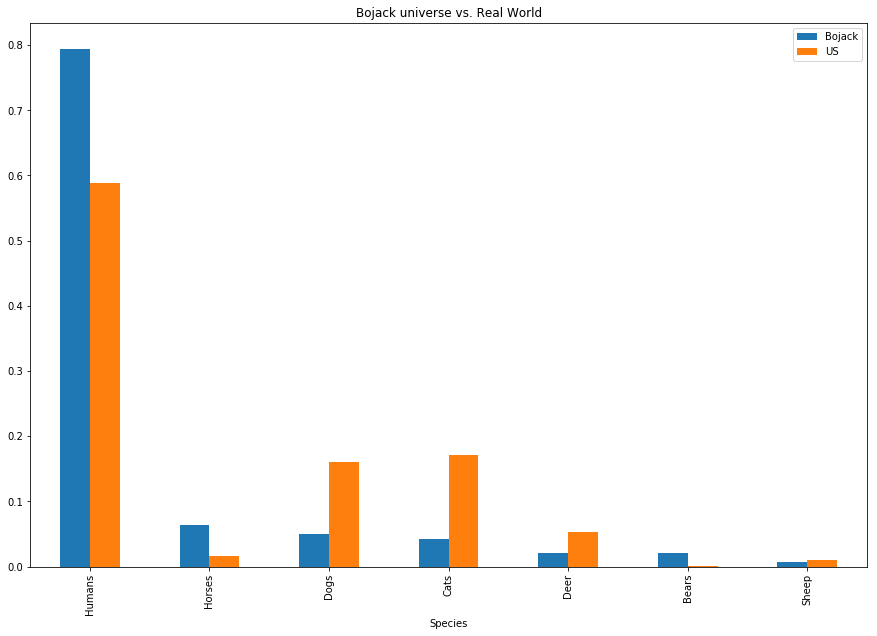

In [252]:
clean1.plot(x='Species', y=['Bojack','US'], kind="bar", figsize=(15, 10), title= 'Bojack universe vs. Real World')

In [253]:
clean1['Difference']= (clean1['Bojack']-clean1['US']).round(3)

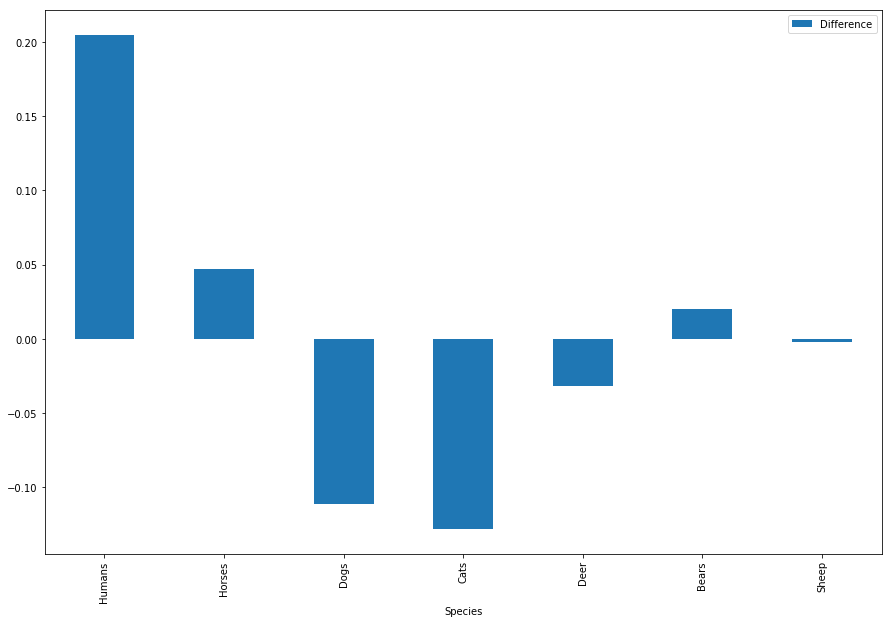

In [255]:
clean1.plot(x='Species', y=['Difference'], kind="bar", figsize=(15, 10))